In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('csv/nvidia.csv')
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NVDA,2016-04-18 00:00:00+00:00,36.97,37.06,36.610,37.06,7683044,36.296506,36.384867,35.943065,36.384867,7683044,0.0,1.0
1,NVDA,2016-04-19 00:00:00+00:00,36.31,37.18,36.080,37.11,7728777,35.648530,36.502681,35.422720,36.433956,7728777,0.0,1.0
2,NVDA,2016-04-20 00:00:00+00:00,36.45,36.67,36.210,36.25,5004434,35.785979,36.001971,35.550351,35.589623,5004434,0.0,1.0
3,NVDA,2016-04-21 00:00:00+00:00,36.41,36.63,36.250,36.46,4456989,35.746708,35.962700,35.589623,35.795797,4456989,0.0,1.0
4,NVDA,2016-04-22 00:00:00+00:00,36.27,36.78,36.145,36.53,5588539,35.609258,36.109968,35.486536,35.864522,5588539,0.0,1.0


In [3]:
df1=data.reset_index()['close']
df1

0        36.97
1        36.31
2        36.45
3        36.41
4        36.27
         ...  
1254    608.36
1255    627.18
1256    611.08
1257    645.49
1258    636.50
Name: close, Length: 1259, dtype: float64

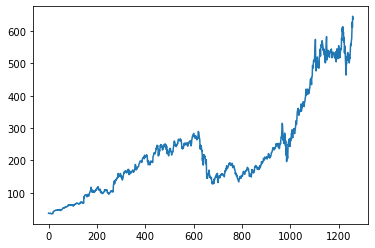

In [4]:
plt.plot(df1)

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [7]:
training_size,test_size

(881, 378)

In [10]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
print(X_train.shape), print(y_train.shape)

(780, 100)
(780,)


(None, None)

In [13]:
print(X_test.shape), print(ytest.shape)

(277, 100)
(277,)


(None, None)

In [14]:
# reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [16]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),
                                            epochs=100,
                                            batch_size=64,
                                            verbose=1)

Epoch 1/100
13/13 [==============================] - 7s 197ms/step - loss: 0.0242 - val_loss: 0.1064
Epoch 2/100
13/13 [==============================] - 1s 84ms/step - loss: 0.0033 - val_loss: 0.0375
Epoch 3/100
13/13 [==============================] - 1s 87ms/step - loss: 0.0012 - val_loss: 0.0111
Epoch 4/100
13/13 [==============================] - 1s 90ms/step - loss: 7.1943e-04 - val_loss: 0.0057
Epoch 5/100
13/13 [==============================] - 1s 88ms/step - loss: 5.4192e-04 - val_loss: 0.0046
Epoch 6/100
13/13 [==============================] - 1s 91ms/step - loss: 5.0075e-04 - val_loss: 0.0061
Epoch 7/100
13/13 [==============================] - 1s 89ms/step - loss: 5.3878e-04 - val_loss: 0.0060
Epoch 8/100
13/13 [==============================] - 1s 90ms/step - loss: 4.8839e-04 - val_loss: 0.0049
Epoch 9/100
13/13 [==============================] - 1s 90ms/step - loss: 4.5862e-04 - val_loss: 0.0050
Epoch 10/100
13/13 [==============================] - 1s 88ms/step - loss: 

13/13 [==============================] - 1s 95ms/step - loss: 2.1181e-04 - val_loss: 0.0037
Epoch 80/100
13/13 [==============================] - 1s 96ms/step - loss: 1.9530e-04 - val_loss: 0.0024
Epoch 81/100
13/13 [==============================] - 1s 93ms/step - loss: 1.8330e-04 - val_loss: 0.0031
Epoch 82/100
13/13 [==============================] - 1s 95ms/step - loss: 1.7400e-04 - val_loss: 0.0020
Epoch 83/100
13/13 [==============================] - 1s 95ms/step - loss: 2.1074e-04 - val_loss: 0.0026
Epoch 84/100
13/13 [==============================] - 1s 94ms/step - loss: 1.8857e-04 - val_loss: 0.0020
Epoch 85/100
13/13 [==============================] - 1s 94ms/step - loss: 1.9159e-04 - val_loss: 0.0025
Epoch 86/100
13/13 [==============================] - 1s 98ms/step - loss: 1.8283e-04 - val_loss: 0.0031
Epoch 87/100
13/13 [==============================] - 1s 95ms/step - loss: 1.8739e-04 - val_loss: 0.0011
Epoch 88/100
13/13 [==============================] - 1s 95ms/step -

In [17]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [18]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
# Calculate RMSE 
math.sqrt(mean_squared_error(y_train,train_predict))

177.4724101727029

In [20]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

424.16260027865746

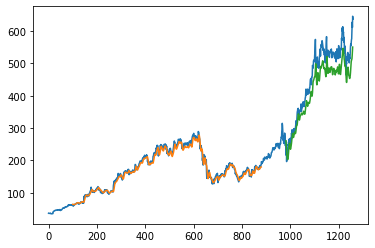

In [22]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

378

In [29]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
#Plot price movements over the next 30 days
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.87640274]
101
1 day input [0.80369394 0.79175741 0.80989963 0.81163526 0.82082098 0.82006779
 0.83018683 0.82046076 0.83108739 0.83426391 0.81744797 0.78998903
 0.79270709 0.7953924  0.81474629 0.81813567 0.81040722 0.81687489
 0.81233933 0.81628543 0.81274868 0.79513042 0.79411524 0.78797505
 0.79080772 0.80407054 0.79812683 0.80195831 0.82103384 0.76927611
 0.817055   0.81265043 0.83522997 0.82627348 0.82935176 0.80764004
 0.78532248 0.79617834 0.81847952 0.85134184 0.84119005 0.83730945
 0.82303145 0.78913759 0.79786485 0.79385326 0.81004699 0.83098914
 0.82926989 0.8380299  0.83323236 0.88875608 0.87726164 0.91007483
 0.94193834 0.92297742 0.94714522 0.9193588  0.91431566 0.92070146
 0.88331996 0.86932032 0.89270218 0.81466442 0.84132104 0.84965533
 0.82113209 0.78173661 0.75327886 0.75925532 0.70238894 0.76310317
 0.75969741 0.79409887 0.78509325 0.80705058 0.81360012 0.81687489
 0.77634961 0.78442192 0.8067231  0.79915838 0.77114273 0.7640856
 0.7839962  0.7911352  0.7861248  

8 day output [[0.53343034]]
9 day input [0.83108739 0.83426391 0.81744797 0.78998903 0.79270709 0.7953924
 0.81474629 0.81813567 0.81040722 0.81687489 0.81233933 0.81628543
 0.81274868 0.79513042 0.79411524 0.78797505 0.79080772 0.80407054
 0.79812683 0.80195831 0.82103384 0.76927611 0.817055   0.81265043
 0.83522997 0.82627348 0.82935176 0.80764004 0.78532248 0.79617834
 0.81847952 0.85134184 0.84119005 0.83730945 0.82303145 0.78913759
 0.79786485 0.79385326 0.81004699 0.83098914 0.82926989 0.8380299
 0.83323236 0.88875608 0.87726164 0.91007483 0.94193834 0.92297742
 0.94714522 0.9193588  0.91431566 0.92070146 0.88331996 0.86932032
 0.89270218 0.81466442 0.84132104 0.84965533 0.82113209 0.78173661
 0.75327886 0.75925532 0.70238894 0.76310317 0.75969741 0.79409887
 0.78509325 0.80705058 0.81360012 0.81687489 0.77634961 0.78442192
 0.8067231  0.79915838 0.77114273 0.7640856  0.7839962  0.7911352
 0.7861248  0.81733336 0.84769047 0.85920128 0.85094886 0.86941856
 0.88078201 0.88621813 0.

 0.51487309 0.51229572 0.5058319  0.49477252]
17 day output [[0.47909534]]
18 day input [0.81687489 0.81233933 0.81628543 0.81274868 0.79513042 0.79411524
 0.78797505 0.79080772 0.80407054 0.79812683 0.80195831 0.82103384
 0.76927611 0.817055   0.81265043 0.83522997 0.82627348 0.82935176
 0.80764004 0.78532248 0.79617834 0.81847952 0.85134184 0.84119005
 0.83730945 0.82303145 0.78913759 0.79786485 0.79385326 0.81004699
 0.83098914 0.82926989 0.8380299  0.83323236 0.88875608 0.87726164
 0.91007483 0.94193834 0.92297742 0.94714522 0.9193588  0.91431566
 0.92070146 0.88331996 0.86932032 0.89270218 0.81466442 0.84132104
 0.84965533 0.82113209 0.78173661 0.75327886 0.75925532 0.70238894
 0.76310317 0.75969741 0.79409887 0.78509325 0.80705058 0.81360012
 0.81687489 0.77634961 0.78442192 0.8067231  0.79915838 0.77114273
 0.7640856  0.7839962  0.7911352  0.7861248  0.81733336 0.84769047
 0.85920128 0.85094886 0.86941856 0.88078201 0.88621813 0.9392039
 0.97001948 0.94365759 1.         0.985279

 0.36383605 0.34249049 0.32399094 0.30845949]
26 day output [[0.295608]]
27 day input [0.79812683 0.80195831 0.82103384 0.76927611 0.817055   0.81265043
 0.83522997 0.82627348 0.82935176 0.80764004 0.78532248 0.79617834
 0.81847952 0.85134184 0.84119005 0.83730945 0.82303145 0.78913759
 0.79786485 0.79385326 0.81004699 0.83098914 0.82926989 0.8380299
 0.83323236 0.88875608 0.87726164 0.91007483 0.94193834 0.92297742
 0.94714522 0.9193588  0.91431566 0.92070146 0.88331996 0.86932032
 0.89270218 0.81466442 0.84132104 0.84965533 0.82113209 0.78173661
 0.75327886 0.75925532 0.70238894 0.76310317 0.75969741 0.79409887
 0.78509325 0.80705058 0.81360012 0.81687489 0.77634961 0.78442192
 0.8067231  0.79915838 0.77114273 0.7640856  0.7839962  0.7911352
 0.7861248  0.81733336 0.84769047 0.85920128 0.85094886 0.86941856
 0.88078201 0.88621813 0.9392039  0.97001948 0.94365759 1.
 0.98527991 0.87640274 0.85192674 0.80449289 0.74658507 0.68700677
 0.63248777 0.58777845 0.55493444 0.53343034 0.521219

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [33]:
len(df1)

1259

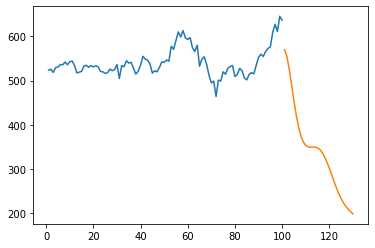

In [36]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))